In [142]:
import numpy as np
from scipy import stats

# for pi
from mpmath import mp
import mpmath

In [8]:
import matplotlib.pyplot as plt

In [22]:
def plot_complex_eigenvalues(w, ax):
    """Plots `w` on the complex plane."""
    w_r, w_c = w.real, w.imag
    ax.scatter(w_r, w_c)

## Choose `n`

In [114]:
n = 1000

## 1.1 i.i.d Gaussian entries.

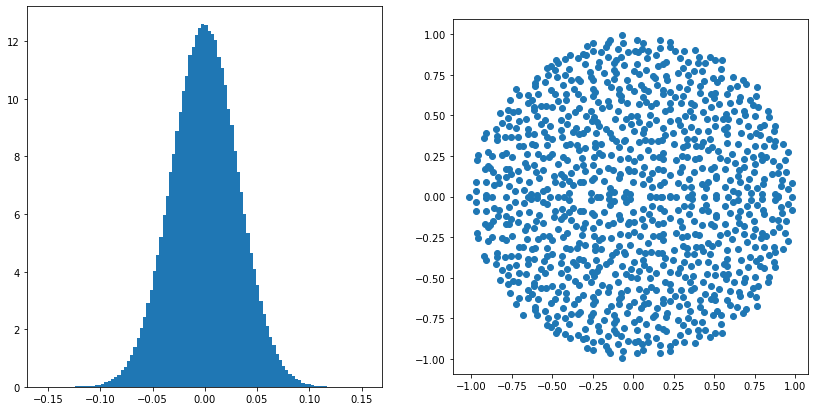

In [135]:
H = np.random.normal(scale=1, size=(n,n)) / np.sqrt(n)

# Extract eigenvalues.
w, v = np.linalg.eig(H)

# Plot.
fig, ax = plt.subplots(1,2,figsize=(14,7))

# Plot distribution.
ax[0].hist(H.flatten(), bins=100, density=True, stacked=True)

# Plot circular law.
plot_complex_eigenvalues(w[1:], ax[1])
ax[1].set_aspect('equal')




## Discrete random w/ equal probability. 

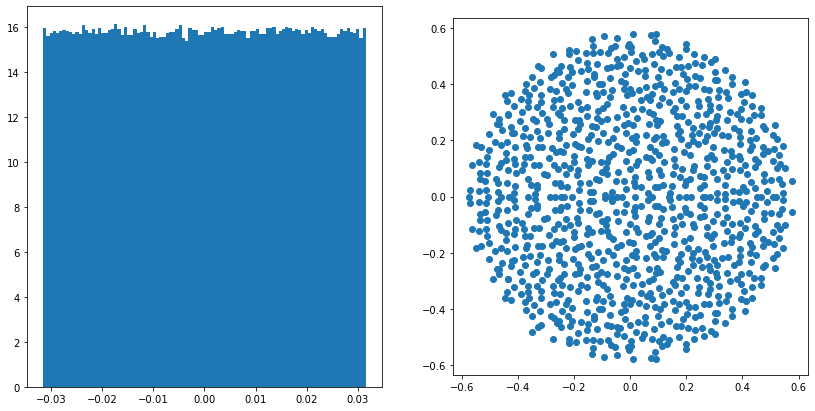

In [176]:
# Random values [0, 1]
H = np.random.rand(n,n) 

# Rescale H to appropriate bounds (+-1/sqrt(n))
H = (H - .5) * 2 / np.sqrt(n)

w, v = np.linalg.eig(H)
fig, ax = plt.subplots(1,2,figsize=(14,7))

# Plot distribution.
ax[0].hist(H.flatten(), bins=100, density=True, stacked=True)

# Plot circular law.
plot_complex_eigenvalues(w[1:], ax[1])
ax[1].set_aspect('equal')



## Create matrix from digits of number (c)

In [173]:
def split_str_into_vector(number_as_str):
    return np.array([float(letter) for letter in number_as_str if letter.isdigit()])

def construct_H_from_vector(v):
    b, var = np.mean(v), np.var(v)
    v_scale = 1/ np.sqrt(n * var)
    return (v.reshape(n, n) - b) * v_scale

mp.dps = n ** 2

### c = $\pi$

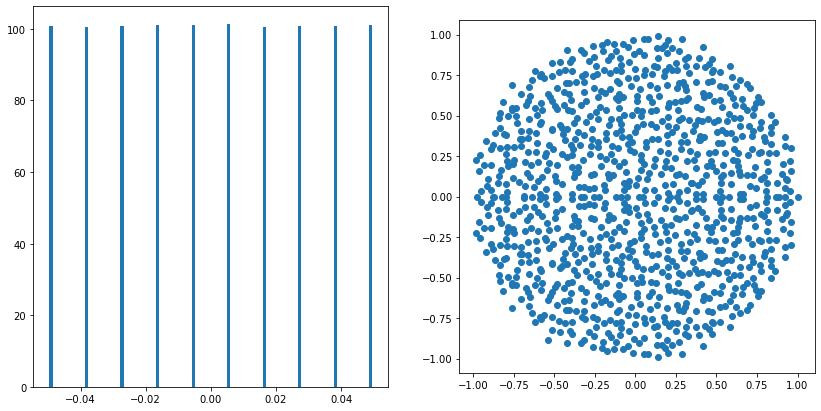

In [184]:
## PI
c = mp.pi

# Create string with appropriate number of digits.
c_str = mpmath.nstr(c, n = mp.dps)

# Split string into vector such that each element is a digit from original number.
c_vec = split_str_into_vector(c_str)

# Construct `H` matrix.
H = construct_H_from_vector(c_vec)

# Analyze.
w, v = np.linalg.eig(H)

# Plot.
fig, ax = plt.subplots(1,2,figsize=(14,7))

# Plot distribution.
ax[0].hist(H.flatten(), bins=100, density=True, stacked=True)

# Plot circular law.
plot_complex_eigenvalues(w[1:], ax[1])
ax[1].set_aspect('equal')

### c = $\sqrt{2}$

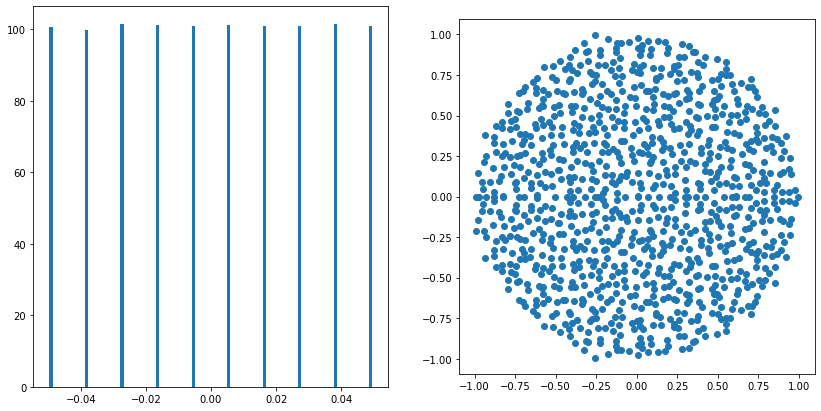

In [182]:
c = mp.sqrt(2.)

# Create string with appropriate number of digits.
c_str = mpmath.nstr(c, n = mp.dps)

# Split string into vector such that each element is a digit from original number.
c_vec = split_str_into_vector(c_str)

# Construct `H` matrix.
H = construct_H_from_vector(c_vec)

# Analyze.
w, v = np.linalg.eig(H)

# Plot.
fig, ax = plt.subplots(1,2,figsize=(14,7))

# Plot distribution.
ax[0].hist(H.flatten(), bins=100, density=True, stacked=True)

# Plot circular law.
plot_complex_eigenvalues(w[1:], ax[1])
ax[1].set_aspect('equal')

### c = e

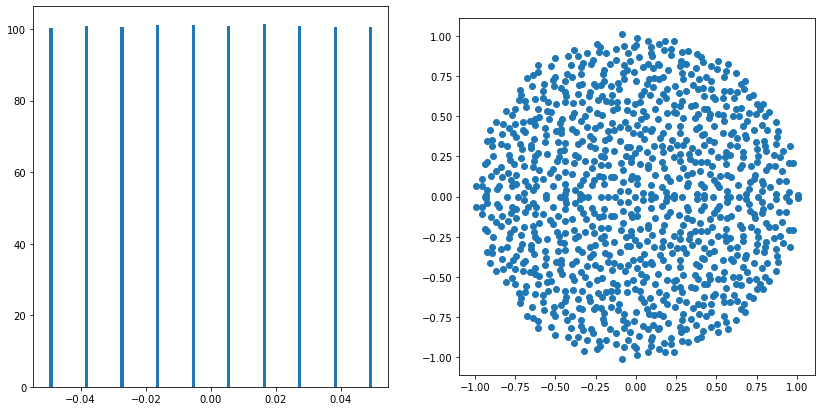

In [183]:
c = mp.e

# Create string with appropriate number of digits.
c_str = mpmath.nstr(c, n = mp.dps)

# Split string into vector such that each element is a digit from original number.
c_vec = split_str_into_vector(c_str)

# Construct `H` matrix.
H = construct_H_from_vector(c_vec)

# Analyze.
w, v = np.linalg.eig(H)

# Plot.
fig, ax = plt.subplots(1,2,figsize=(14,7))

# Plot distribution.
ax[0].hist(H.flatten(), bins=100, density=True, stacked=True)

# Plot circular law.
plot_complex_eigenvalues(w[1:], ax[1])
ax[1].set_aspect('equal')

# Problem 3

In [205]:
theta = 4
n = 1000

def sigma(theta):
    return None

def construct_W(n):
    W = np.random.normal(scale=1/np.sqrt(n), size=(n,n))
    return 1/np.sqrt(2) * (W + np.transpose(W))

In [206]:
m = 1000
largest_eigenvector=[]

# Construct signal matrix.
signal_matrix = np.zeros((n,n))
signal_matrix[0,0] = theta

for _ in range(m):
    # Construct `W`
    W = construct_W(n)
    
    # Construct `Y`
    Y = signal_matrix + W

    w = np.linalg.eigvalsh(Y)
    
    # Get eigenvectors.
#     w, v = np.linalg.eig(H)
    
    # Sort by size (smallest to largest).
#     w = sorted(w)

    largest_eigenvector.append(w[-1])

largest_eigenvector = np.array(largest_eigenvector)

In [207]:
# Define big Lambda.
Lambda = theta + 1 / theta

# Define variance.
analytic_variance =2 * ((1/2) + Lambda / np.sqrt(Lambda **2 - 4)) ** -1

# Scale eigenvectors
scaled_eigenvectors = np.sqrt(n) * (largest_eigenvector - Lambda) / np.sqrt(analytic_variance)

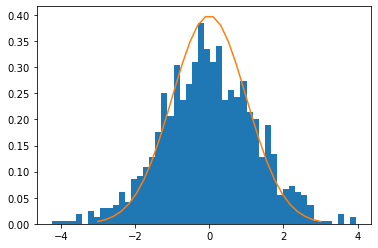

In [208]:
x_plot = np.linspace(-3,3,30)
plt.hist(scaled_eigenvectors, bins=50, density=True, stacked=True)
plt.plot(x_plot, stats.norm.pdf(x_plot))